In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks/For git

/content/drive/My Drive/Colab Notebooks/For git


In [3]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/For git/')

In [4]:
from all_methods import *

Using TensorFlow backend.


###Подготовка первых признаковых описаний

In [16]:
way = '/content/drive/My Drive/Colab Notebooks/First_features/'
update_way(way)

In [17]:
# если использовать это, то следующую ячейку выполнять не надо
objects = np.load(way + 'objects__tr=50_smpl=100.npy')
features1 = np.load(way + 'features1__tr=50_smpl=100.npy')
X = (features1 - np.mean(features1, axis = 0)) / np.std(features1, axis = 0)

In [ ]:
ampField = np.load("ampField.npy", allow_pickle=True)
objects = create_objects('objects', ampField, num_traces=50, num_samples=100)
features1 = create_features1('features1', objects)
X = (features1 - np.mean(features1, axis = 0)) / np.std(features1, axis = 0)
visualize_objects(objects[:100])

###Кластеризация после isomap до 10

In [18]:
way = '/content/drive/My Drive/Colab Notebooks/First_features/Isomap/'
update_way(way)

In [7]:
# если использовать это, то следующую ячейку выполнять не надо
X_iso10 = np.load(way + "X_iso10.npy")

In [ ]:
X_iso10 = reduce_isomap('X_iso10', X, 10, 5)

In [8]:
X_iso10_scaled = (X_iso10 - np.mean(X_iso10, axis = 0)) / np.std(X_iso10, axis = 0)

####Чем управляет xi

In [ ]:
# если использовать это, то следующую ячейку выполнять не надо
xies = [10, 0.1, 0.01, 0.001, 0.0001, 0.00001]
X_iso10_scaled_opticsXiArray = []
X_iso10_scaled_opticsXiArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsXiArray__min_samples=30_xi=10_min_cluster_size=5.pkl', 'rb')))
X_iso10_scaled_opticsXiArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsXiArray__min_samples=30_xi=0.1_min_cluster_size=5.pkl', 'rb')))
X_iso10_scaled_opticsXiArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsXiArray__min_samples=30_xi=0.01_min_cluster_size=5.pkl', 'rb')))
X_iso10_scaled_opticsXiArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsXiArray__min_samples=30_xi=0.001_min_cluster_size=5.pkl', 'rb')))
X_iso10_scaled_opticsXiArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsXiArray__min_samples=30_xi=0.0001_min_cluster_size=5.pkl', 'rb')))
X_iso10_scaled_opticsXiArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsXiArray__min_samples=30_xi=1e-05_min_cluster_size=5.pkl', 'rb')))

In [ ]:
xies = [10, 0.1, 0.01, 0.001, 0.0001, 0.00001]
X_iso10_scaled_opticsXiArray = []
for xi_s in xies:
  X_iso10_scaled_opticsXiArray.append(clust_optics('X_iso10_scaled_opticsXiArray', X_iso10_scaled, min_samples=30, xi=xi_s, min_cluster_size=5))

In [ ]:
# для 1 почему-то ошибка Division by zero
X_iso10_scaled_opticsXiArray.append(clust_optics('X_iso10_scaled_opticsXiArray', X_iso10_scaled, min_samples=30, xi=1, min_cluster_size=5))

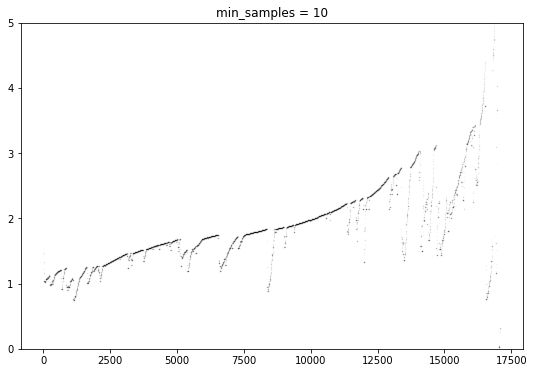

число кластеров:  0
число непопавших:  17080




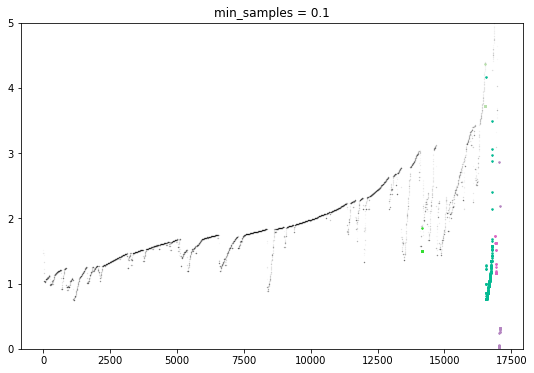

число кластеров:  5
число непопавших:  16686




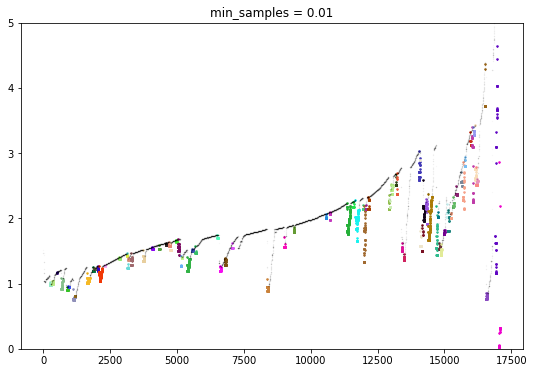

число кластеров:  84
число непопавших:  13824




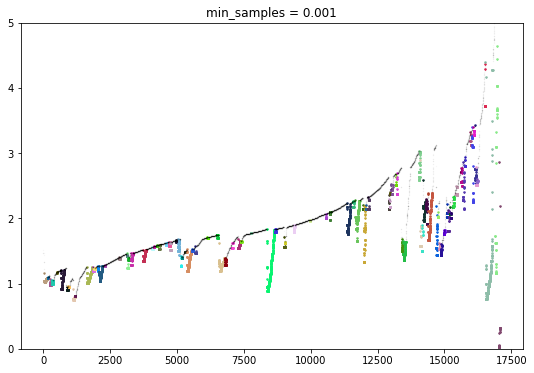

число кластеров:  98
число непопавших:  11967




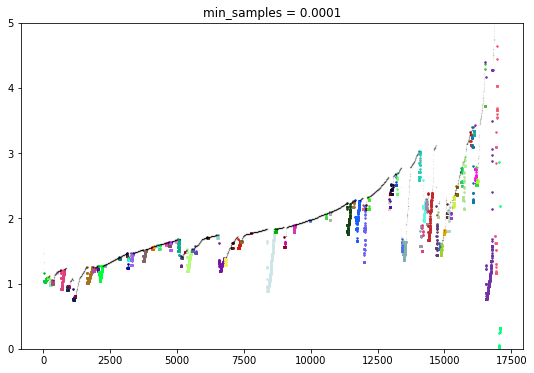

число кластеров:  99
число непопавших:  11889




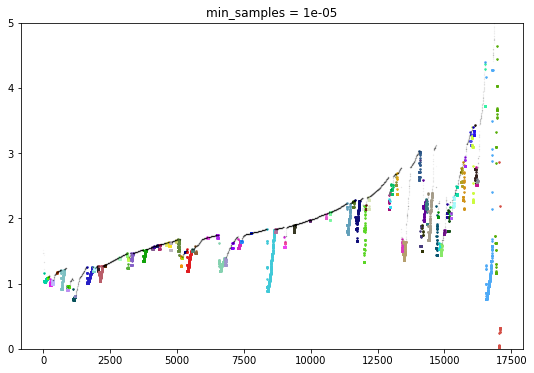

число кластеров:  99
число непопавших:  11888




In [ ]:
for opt, xi_s in zip(X_iso10_scaled_opticsXiArray, xies):
  reachability_plot(opt, limy=[0,5], title='min_samples = ' + str(xi_s))
  plt.show()

  print('число кластеров: ', np.unique(opt.labels_).shape[0] - 1)
  print('число непопавших: ', np.count_nonzero(opt.labels_ == -1))
  print('\n')

####Чем управляет min_samples

In [ ]:
# если использовать это, то следующую ячейку выполнять не надо
min_samples = [3, 5, 7, 9, 12, 15, 20, 25, 30, 40, 60]
X_iso10_scaled_opticsMinSmplArray = []
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=3_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=5_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=7_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=9_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=12_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=15_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=20_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=25_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=30_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=40_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray__min_samples=60_xi=0.001_min_cluster_size=30.pkl', 'rb')))

In [ ]:
min_samples = [3, 5, 7, 9, 12, 15, 20, 25, 30, 40, 60]
X_iso10_scaled_opticsMinSmplArray = []
for m_s in min_samples:
  X_iso10_scaled_opticsMinSmplArray.append(clust_optics('X_iso10_scaled_opticsMinSmplArray', X_iso10_scaled, min_samples=m_s, xi=0.001, min_cluster_size=30))

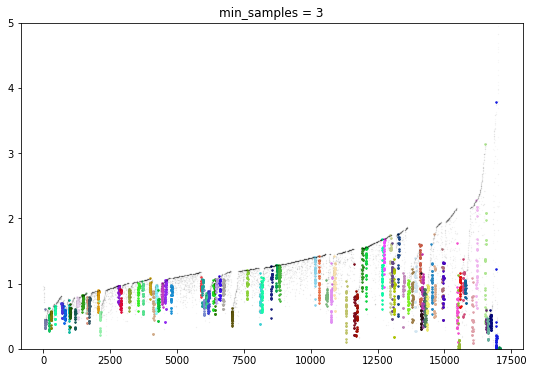

число кластеров:  89
число непопавших:  13981




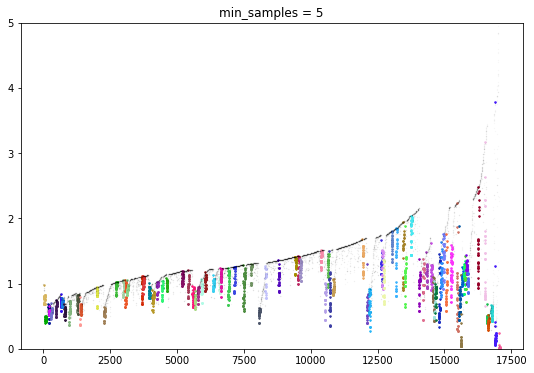

число кластеров:  90
число непопавших:  13771




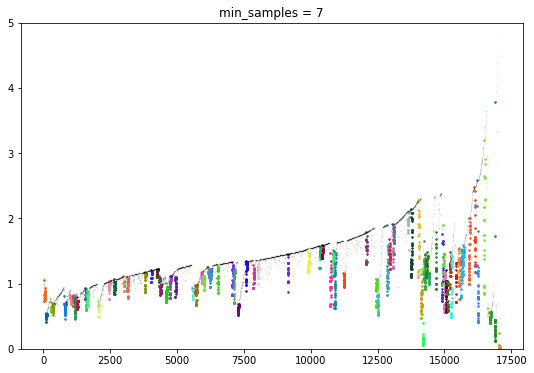

число кластеров:  84
число непопавших:  13686




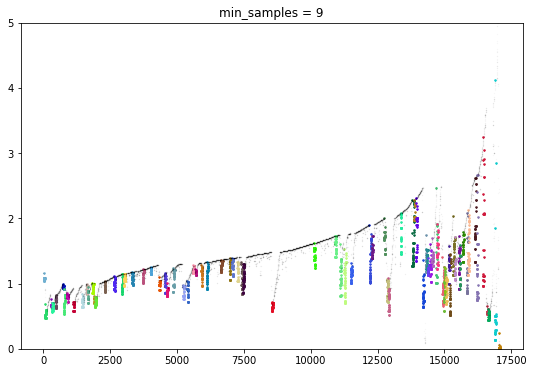

число кластеров:  81
число непопавших:  13704




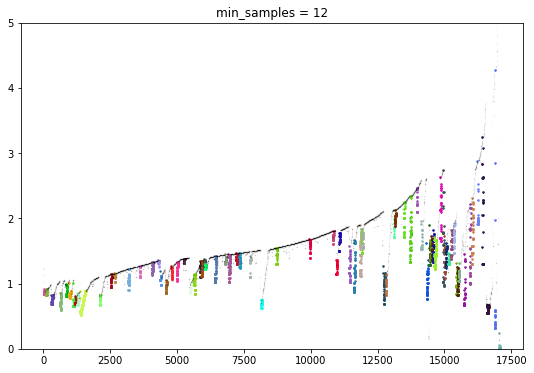

число кластеров:  77
число непопавших:  13616




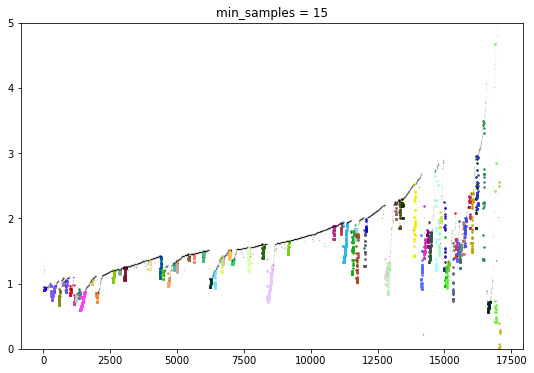

число кластеров:  74
число непопавших:  13261




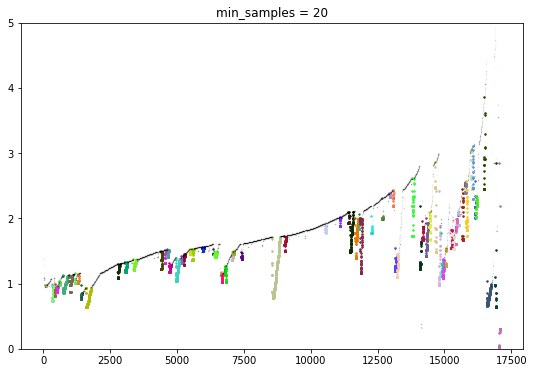

число кластеров:  73
число непопавших:  12584




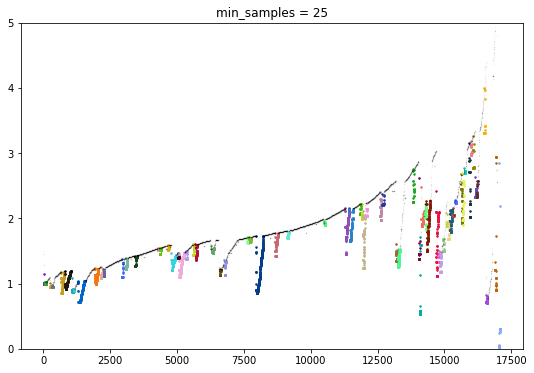

число кластеров:  70
число непопавших:  12277




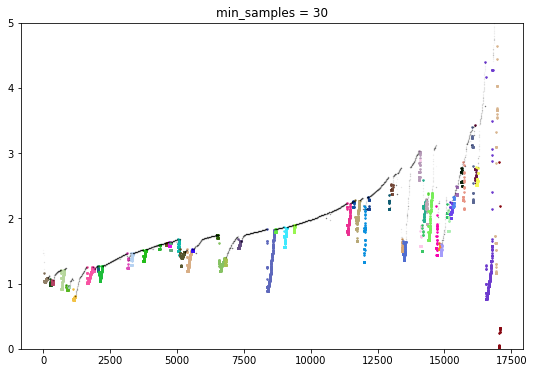

число кластеров:  61
число непопавших:  12345




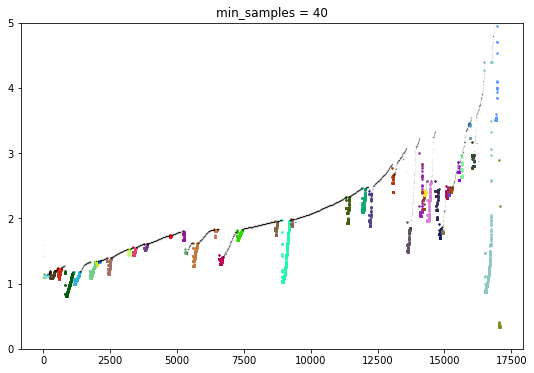

число кластеров:  47
число непопавших:  12325




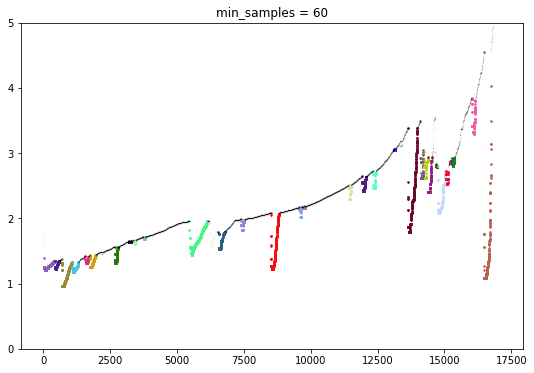

число кластеров:  33
число непопавших:  11266




In [ ]:
for opt, m_s in zip(X_iso10_scaled_opticsMinSmplArray, min_samples):
  reachability_plot(opt, limy=[0,5], title='min_samples = ' + str(m_s))
  plt.show()

  print('число кластеров: ', np.unique(opt.labels_).shape[0] - 1)
  print('число непопавших: ', np.count_nonzero(opt.labels_ == -1))
  print('\n')

In [ ]:
# если использовать это, то следующую ячейку выполнять не надо
min_samples2 = [70, 80, 90, 100]
X_iso10_scaled_opticsMinSmplArray2 = []
X_iso10_scaled_opticsMinSmplArray2.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray2__min_samples=70_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray2.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray2__min_samples=80_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray2.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray2__min_samples=90_xi=0.001_min_cluster_size=30.pkl', 'rb')))
X_iso10_scaled_opticsMinSmplArray2.append(pickle.load(open(way + 'X_iso10_scaled_opticsMinSmplArray2__min_samples=100_xi=0.001_min_cluster_size=30.pkl', 'rb')))

In [ ]:
min_samples2 = [70, 80, 90, 100]
X_iso10_scaled_opticsMinSmplArray2 = []
for m_s in min_samples2:
  X_iso10_scaled_opticsMinSmplArray2.append(clust_optics('X_iso10_scaled_opticsMinSmplArray2', X_iso10_scaled, min_samples=m_s, xi=0.001, min_cluster_size=30))

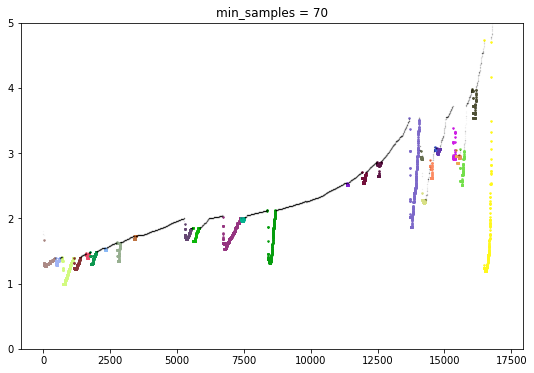

число кластеров:  30
число непопавших:  11762




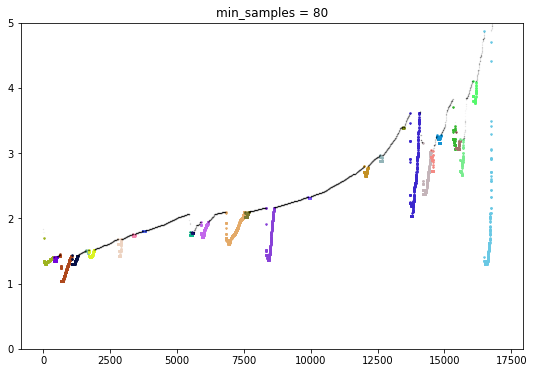

число кластеров:  28
число непопавших:  11933




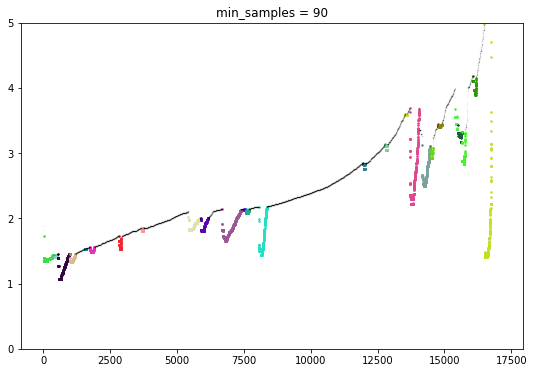

число кластеров:  26
число непопавших:  11884




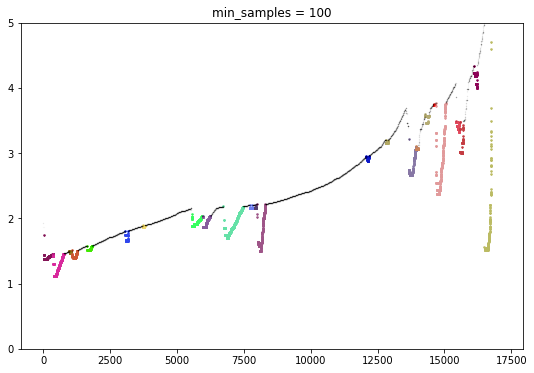

число кластеров:  24
число непопавших:  12174




In [ ]:
for opt, m_s in zip(X_iso10_scaled_opticsMinSmplArray2, min_samples2):
  reachability_plot(opt, limy=[0,5], title='min_samples = ' + str(m_s))
  plt.show()

  print('число кластеров: ', np.unique(opt.labels_).shape[0] - 1)
  print('число непопавших: ', np.count_nonzero(opt.labels_ == -1))
  print('\n')

In [ ]:
# если использовать это, то следующую ячейку выполнять не надо
X_iso10_scaled_optics = pickle.load(open(way + 'X_iso10_scaled_optics__min_samples=60_xi=0.0001_min_cluster_size=60.pkl', 'rb'))

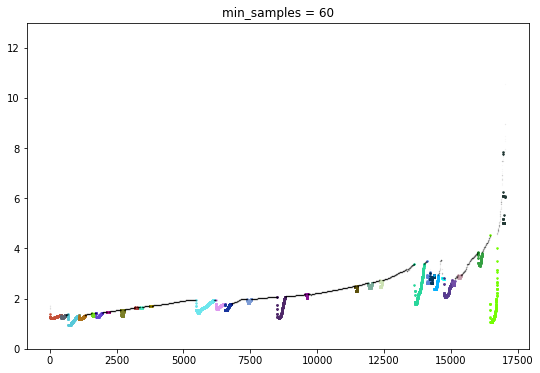

число кластеров:  31
число непопавших:  11262


In [ ]:
# судя по графикам в какой-то мере оптимальный по числу скластеризовавшихся является кластеризация с xi=0.0001, min_samples=60
# однако лучше получается без масштабирования после понижения (см. ячейки далее)
X_iso10_scaled_optics = clust_optics('X_iso10_scaled_optics', X_iso10_scaled, min_samples=60, xi=0.0001, min_cluster_size=60)
reachability_plot(X_iso10_scaled_optics, limy=[0,8], title='min_samples = 60')
plt.show()

print('число кластеров: ', np.unique(X_iso10_scaled_optics.labels_).shape[0] - 1)
print('число непопавших: ', np.count_nonzero(X_iso10_scaled_optics.labels_ == -1))

In [ ]:
# если использовать это, то следующую ячейку выполнять не надо
X_iso10_optics = pickle.load(open(way + 'X_iso10_optics__min_samples=60_xi=0.0001_min_cluster_size=60.pkl', 'rb'))

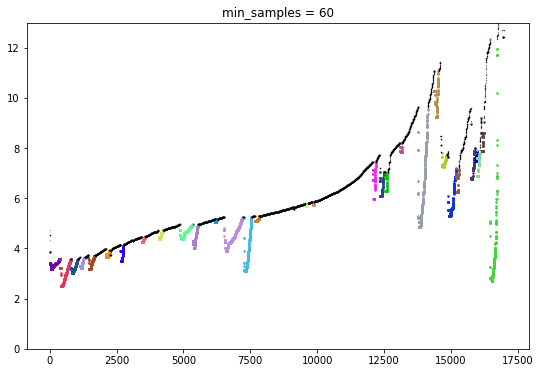

число кластеров:  31
число непопавших:  10768


In [ ]:
# судя по графикам в какой-то мере оптимальный по числу скластеризовавшихся является кластеризация с xi=0.0001, min_samples=60
X_iso10_optics = clust_optics('X_iso10_optics', X_iso10, min_samples=60, xi=0.0001, min_cluster_size=60)
reachability_plot(X_iso10_optics, limy=[0,13], title='min_samples = 60')
plt.show()

print('число кластеров: ', np.unique(X_iso10_optics.labels_).shape[0] - 1)
print('число непопавших: ', np.count_nonzero(X_iso10_optics.labels_ == -1))

####**Попытка кластеризации разрезов вне кластеров**

*что если кластеризировать итеративно, пока всё не скластеризуется?*

In [19]:
way = '/content/drive/My Drive/Colab Notebooks/First_features/Isomap/'
update_way(way)

name_file = 'X_iso10_optics__min_samples=60_xi=0.0001_min_cluster_size=60.pkl'

X_iso10_optics = pickle.load(open(way + name_file, 'rb'))

In [20]:
X_iso10_invlabels = heavy_clusters(X_iso10_optics)

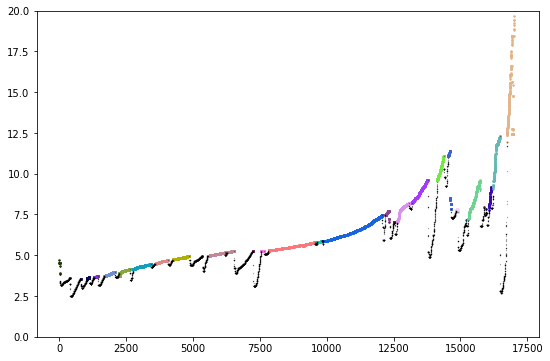

In [21]:
reachability_plot(X_iso10_optics, labels_cluster_oder=X_iso10_invlabels, limy=[0,20], limx=[0,0])

In [22]:
visualize_clusters(objects, X_iso10_invlabels)

Output hidden; open in https://colab.research.google.com to view.

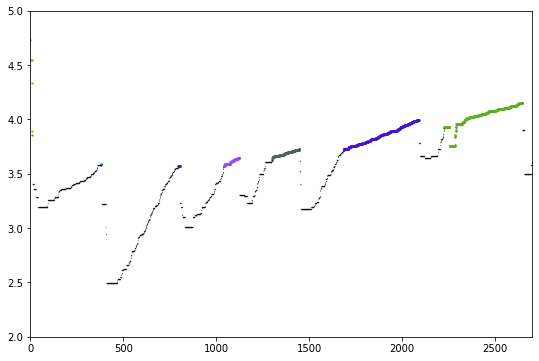

In [24]:
reachability_plot(X_iso10_optics, labels_cluster_oder=X_iso10_invlabels, limy=[2,5], limx=[0,2700])

In [25]:
oneBadCluster = X_iso10[X_iso10_invlabels == 5]
oneBadCluster = np.vstack((oneBadCluster, X_iso10[X_iso10_invlabels == 6]))

In [26]:
oneBadCluster_optics = clust_optics('oneBadCluster_optics', oneBadCluster, min_samples=5, xi=0.001, min_cluster_size=3)

In [27]:
np.unique(oneBadCluster_optics.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42])

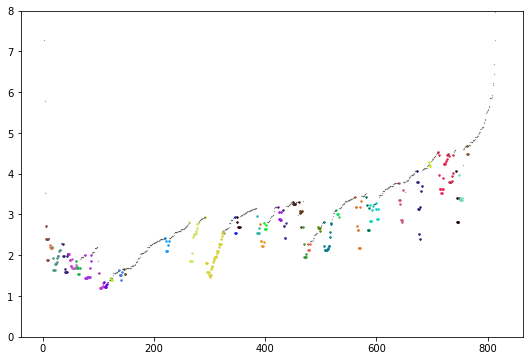

In [28]:
reachability_plot(oneBadCluster_optics, limy=[0,8])

In [29]:
oneBadClusterObjects = objects[X_iso10_invlabels == 5]
oneBadClusterObjects = np.vstack((oneBadClusterObjects, objects[X_iso10_invlabels == 6]))

In [30]:
visualize_clusters(oneBadClusterObjects, oneBadCluster_optics.labels_) # хотя бы половина разрезов становится на свои места

Output hidden; open in https://colab.research.google.com to view.

####Ещё работа с графиком достижимости

In [ ]:
way = '/content/drive/My Drive/Colab Notebooks/First_features/Isomap/'
name_file = 'X_iso10_optics__min_samples=60_xi=0.0001_min_cluster_size=60.pkl'

X_iso10_optics = pickle.load(open(way + name_file, 'rb'))

In [ ]:
X_iso10_optics.reachability_[X_iso10_optics.ordering_]

array([         inf,   4.72883409,   4.54811342, ..., 325.41894137,
       354.78704473, 411.13197181])

In [ ]:
for i in np.arange(10,17000,500):
  reachability_plot(X_iso10_optics, limx=[0,0],limy=[0,25], obj_num=i)
  visualize_objects(objects[X_iso10_optics.ordering_[i:i+15]])

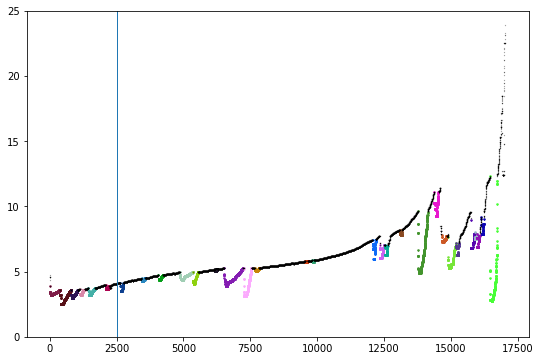

In [ ]:
reachability_plot(X_iso10_optics, limx=[0,0],limy=[0,25], obj_num=2500)

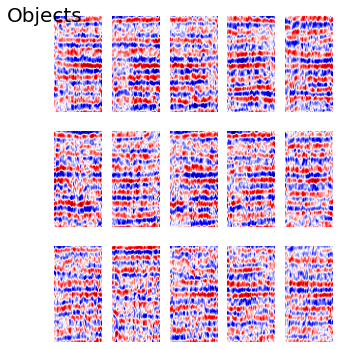

In [ ]:
visualize_objects(objects[X_iso10_optics.ordering_[2100:2115]])

####Двумерная визуализация кластеризации в 10-мерном пространстве признаков

In [ ]:
# если использовать это, то следующую ячейку выполнять не надо
X_iso2 = np.load(way + "X_iso2.npy")

In [ ]:
X_iso2 = reduce_isomap('X_iso2', X, 10, 5)

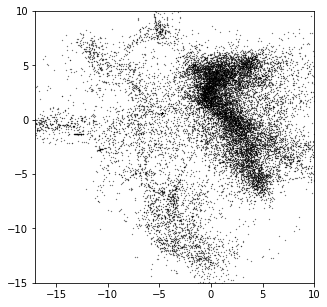

In [ ]:
draw_samples_2D(X_iso2, limx=[-17,10], limy=[-15,10])

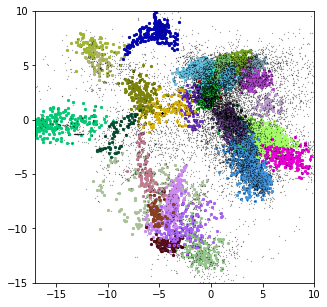

In [ ]:
draw_clusters_2D(X_iso2, X_iso10_optics.labels_, limx=[-17,10], limy=[-15,10])